<a href="https://colab.research.google.com/github/varshitha775/FMML_LABS_PROJECTS_26/blob/main/Mod3_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance
#### Module Coordinator: Jashn Arora

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [10]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.
def predict_with_distances(X_train, y_train, X_test, k):
    distances = []

    for i in range(len(X_train)):
        # Compute L2 distance
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        distances.append((distance, y_train[i]))  # Store distance and corresponding label

    # Sort distances and get the K nearest neighbors
    distances = sorted(distances, key=lambda x: x[0])[:k]

    return distances  # Return the K nearest neighbors with their distances

def k_nearest_neighbors_with_distances(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # Loop over all observations
    predictions = []
    for i in range(len(X_test)):
        neighbors = predict_with_distances(X_train, y_train, X_test[i, :], k)
        predictions.append(neighbors)  # Store neighbors and distances for each test instance

    return predictions  # Return all K-nearest neighbors and distances


# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [11]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

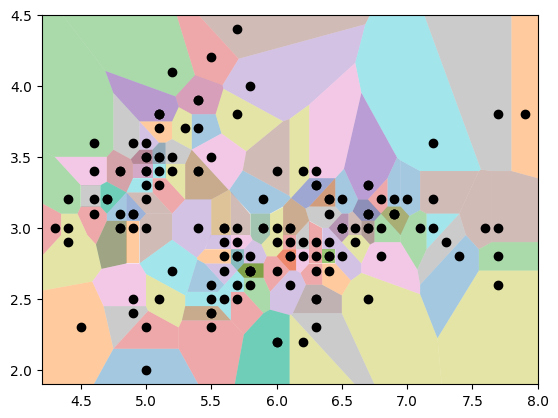

In [12]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [13]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


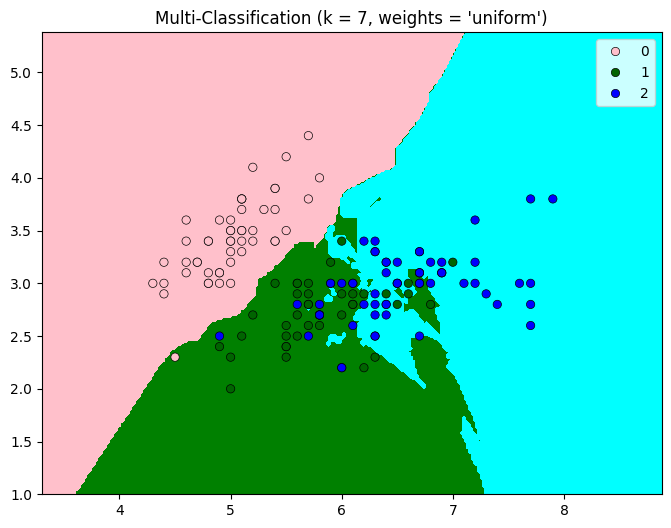

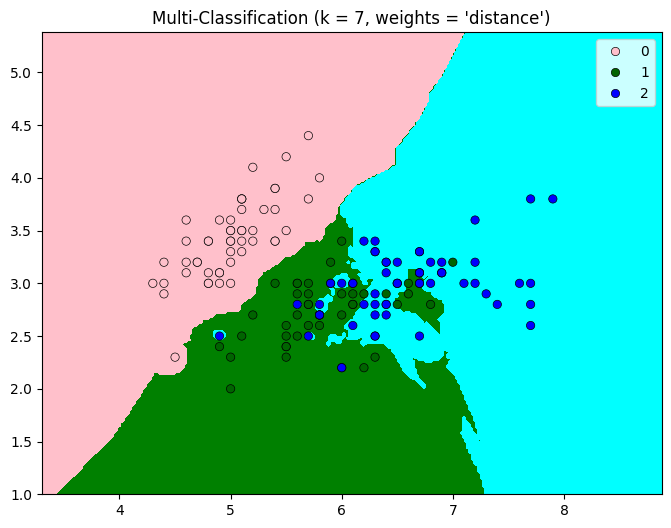

In [14]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

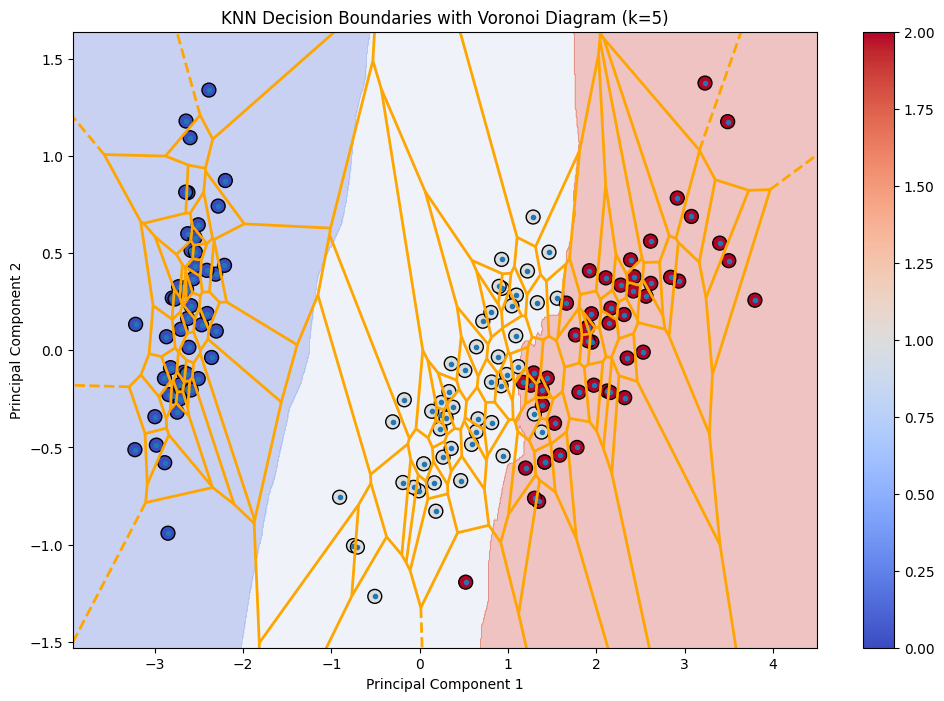

In [15]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the dataset (you can replace this with your own dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Step 1: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Fit KNN
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_pca, y)

# Step 3: Create a mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 4: Predict on the mesh grid to plot decision boundaries
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the Voronoi diagram
plt.figure(figsize=(12, 8))
vor = Voronoi(X_pca)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, alpha=0.6)

# Step 6: Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Step 7: Plot the original data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=100)
plt.title(f"KNN Decision Boundaries with Voronoi Diagram (k={k})")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

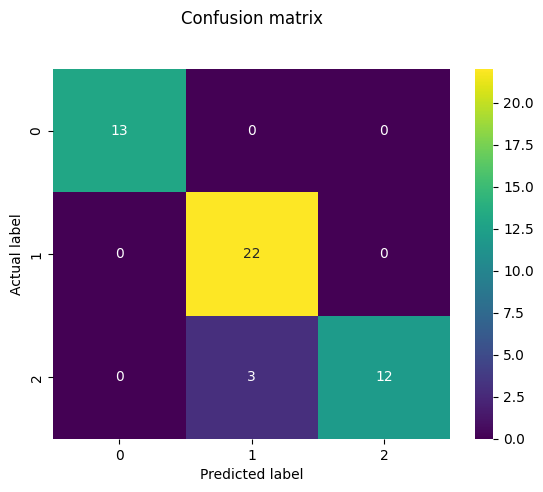

In [18]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [19]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [20]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx to car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx


In [21]:
car_df = pd.read_excel('car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [22]:
import pandas as pd
from sklearn import preprocessing

# Load the dataset
car_df = pd.read_excel('car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx')

# Display the original DataFrame
print("Original DataFrame:")
print(car_df.head())

# Initialize a LabelEncoder instance outside the loop
le = preprocessing.LabelEncoder()

# Apply Label Encoding to each column
for column in car_df.columns:
    # Convert column to string type to avoid mixed types
    car_df[column] = car_df[column].astype(str)
    car_df[column] = le.fit_transform(car_df[column])  # Encode the column

# Display the transformed DataFrame
print("\nEncoded DataFrame:")
print(car_df.head())


Original DataFrame:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Encoded DataFrame:
   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


In [23]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


Original DataFrame:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Column Names:
Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')

Target Variable: class
KeyError: The target variable 'class' does not exist. Please check the column names.


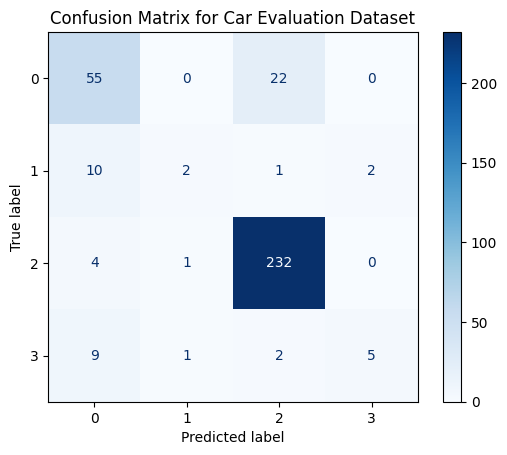

In [25]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
car_df = pd.read_excel('car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx')

# Display the original DataFrame to check column names
print("Original DataFrame:")
print(car_df.head())
print("\nColumn Names:")
print(car_df.columns)  # Print column names to find the target variable

# Encode categorical features
le = preprocessing.LabelEncoder()
for column in car_df.columns:
    car_df[column] = car_df[column].astype(str)  # Convert to string to avoid mixed types
    car_df[column] = le.fit_transform(car_df[column])  # Encode the column

# Identify the actual name of the target variable
# Replace 'class' with the correct column name after checking the output of car_df.columns
target_variable = 'class'  # Update this after confirming the target column name

# Check the target variable column name again
print(f"\nTarget Variable: {target_variable}")

# Split features and target variable
# Make sure to replace 'class' with the correct name if it is different
try:
    X = car_df.drop(target_variable, axis=1)  # Drop the target variable column
    y = car_df[target_variable]  # Target variable
except KeyError:
    print(f"KeyError: The target variable '{target_variable}' does not exist. Please check the column names.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Car Evaluation Dataset")
plt.show()


Original DataFrame:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Column Names:
Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')
KeyError: The target variable 'class' does not exist. Please check the column names.


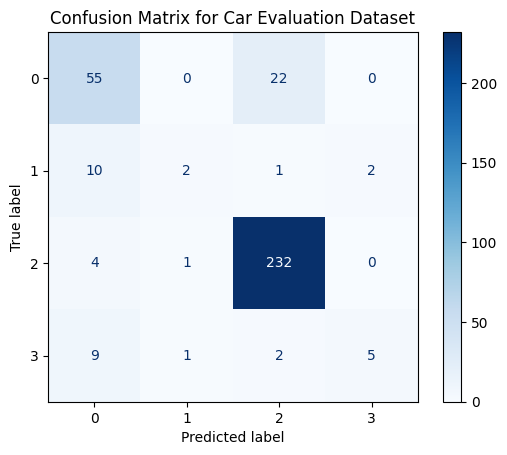


Classification Report:
              precision    recall  f1-score   support

         acc       0.71      0.71      0.71        77
        good       0.50      0.13      0.21        15
       unacc       0.90      0.98      0.94       237
       vgood       0.71      0.29      0.42        17

    accuracy                           0.85       346
   macro avg       0.71      0.53      0.57       346
weighted avg       0.83      0.85      0.83       346



In [26]:
#import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load the dataset
car_df = pd.read_excel('car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx')

# Display the original DataFrame to check column names
print("Original DataFrame:")
print(car_df.head())
print("\nColumn Names:")
print(car_df.columns)  # Print column names to find the target variable

# Encode categorical features
le = preprocessing.LabelEncoder()
for column in car_df.columns:
    car_df[column] = car_df[column].astype(str)  # Convert to string to avoid mixed types
    car_df[column] = le.fit_transform(car_df[column])  # Encode the column

# Identify the actual name of the target variable
target_variable = 'class'  # Update this if the actual name is different after checking

# Split features and target variable
try:
    X = car_df.drop(target_variable, axis=1)  # Drop the target variable column
    y = car_df[target_variable]  # Target variable
except KeyError:
    print(f"KeyError: The target variable '{target_variable}' does not exist. Please check the column names.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Car Evaluation Dataset")
plt.show()

# Convert class labels back to their original string representations
class_labels = le.inverse_transform(knn.classes_)  # Convert encoded class labels back to strings

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))


In [27]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
car_df = pd.read_excel('car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx')

# Display the original DataFrame and column names to check for the target variable
print("Original DataFrame:")
print(car_df.head())
print("\nColumn Names:")
print(car_df.columns)  # Print column names to find the target variable

# Encode categorical features
le = preprocessing.LabelEncoder()
for column in car_df.columns:
    car_df[column] = car_df[column].astype(str)  # Convert to string to avoid mixed types
    car_df[column] = le.fit_transform(car_df[column])  # Encode the column

# Identify the actual name of the target variable
# Ensure you update this after checking the printed column names
target_variable = 'class'  # Replace this with the correct column name

# Check if target_variable exists in the DataFrame
if target_variable not in car_df.columns:
    print(f"Error: The target variable '{target_variable}' does not exist in the DataFrame.")
else:
    # Select two features for the decision boundary
    X = car_df.iloc[:, [0, 1]].values  # Change the indices to select different features
    y = car_df[target_variable].values  # Ensure this matches the actual target variable name

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Blues)  # Decision boundary
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Training data', cmap=plt.cm.Blues)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='s', label='Testing data', cmap=plt.cm.Blues)

    # Customizing the plot
    plt.xlabel('Feature 1')  # Change based on selected features
    plt.ylabel('Feature 2')  # Change based on selected features
    plt.title('Decision Boundary of KNN Classifier on Car Evaluation Dataset')
    plt.legend()
    plt.show()


Original DataFrame:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Column Names:
Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')
Error: The target variable 'class' does not exist in the DataFrame.


In [28]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the dataset
car_df = pd.read_excel('car_evaluation_14149aea70725811bad30ebbe6a1722a.xlsx')

# Display the original DataFrame and column names to check for the target variable
print("Original DataFrame:")
print(car_df.head())
print("\nColumn Names:")
print(car_df.columns)  # Print column names to find the target variable

# Encode categorical features
le = preprocessing.LabelEncoder()
for column in car_df.columns:
    car_df[column] = car_df[column].astype(str)  # Convert to string to avoid mixed types
    car_df[column] = le.fit_transform(car_df[column])  # Encode the column

# Identify the actual name of the target variable
# You need to replace 'class' with the correct target variable name after checking the column names
target_variable = 'class'  # Update this based on actual column names

# Check for the actual name of the target variable
if target_variable not in car_df.columns:
    print(f"'{target_variable}' not found in DataFrame. Available columns: {car_df.columns.tolist()}")
else:
    print("\nUnique values in target variable:")
    print(car_df[target_variable].unique())  # Print unique values of the target variable

    # Select two features for the Voronoi diagram (update indices if necessary)
    X = car_df.iloc[:, [0, 1]].values  # Change the indices to select different features
    y = car_df[target_variable].values  # Ensure this matches the actual target variable name

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Create the Voronoi diagram based on the training data
    vor = Voronoi(X_train)

    # Plotting the Voronoi diagram
    plt.figure(figsize=(10, 6))
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

    # Plot training data points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Training data', cmap=plt.cm.Blues)

    # Plot testing data points
    plt.scatter(X_test[:, 0], X_test[:, 1], c='red', edgecolor='k', marker='s', label='Testing data')

    # Customizing the plot
    plt.xlabel('Feature 1')  # Change based on selected features
    plt.ylabel('Feature 2')  # Change based on selected features
    plt.title('Voronoi Diagram of KNN Classifier on Car Evaluation Dataset')
    plt.legend()
    plt.grid()
    plt.show()


Original DataFrame:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Column Names:
Index(['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc'], dtype='object')
'class' not found in DataFrame. Available columns: ['vhigh', 'vhigh.1', 2, '2.1', 'small', 'low', 'unacc']


### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

The K-Nearest Neighbors (KNN) algorithm can be configured in different ways, particularly concerning how it weighs the contributions of the nearest neighbors. The two common weight options are **'uniform'** and **'distance'**. Here’s a detailed comparison of these two approaches and the potential drawbacks of using KNN.

### 1. **Difference Between 'Uniform' and 'Distance' Weights in KNN:**

- **Uniform Weights:**
  - **Definition:** When weights are set to 'uniform', each of the k-nearest neighbors contributes equally to the prediction of the target variable.
  - **Mechanism:** For classification, the algorithm counts the votes of all k neighbors and selects the class with the most votes, treating all neighbors equally, regardless of their distance from the query point.
  - **Use Case:** This approach is simple and works well when the neighbors are approximately equally relevant.

- **Distance Weights:**
  - **Definition:** When weights are set to 'distance', the contribution of each neighbor is weighted by its distance to the query point. Closer neighbors have a greater influence on the prediction than those further away.
  - **Mechanism:** Typically, this is done by using the inverse of the distance (e.g., `1/distance`) as the weight. Therefore, closer points have a higher impact on the prediction.
  - **Use Case:** This approach is beneficial when closer neighbors are more likely to share the same class as the query point, which can improve the model's performance.

### 2. **Drawbacks of Using KNN:**

While KNN is simple and effective in many scenarios, it has several drawbacks:

1. **Computational Cost:**
   - KNN is computationally expensive, especially for large datasets, as it requires calculating the distance between the query point and all points in the training dataset for every prediction. This can lead to slow performance, particularly with high-dimensional data.

2. **Memory Usage:**
   - KNN requires storing the entire training dataset in memory, which can be inefficient for large datasets. This memory overhead can be a significant limitation in resource-constrained environments.

3. **Curse of Dimensionality:**
   - In high-dimensional spaces, the distance between points becomes less meaningful (points become equidistant), which can degrade the model's performance. This phenomenon is known as the "curse of dimensionality."

4. **Sensitivity to Irrelevant Features:**
   - KNN can be affected by irrelevant features, as they can distort distance calculations. If the dataset has many irrelevant features, the model may not perform well.

5. **Imbalanced Data:**
   - KNN may struggle with imbalanced datasets, where some classes have significantly more instances than others. In such cases, the majority class can dominate the predictions, leading to biased results.

6. **Choosing K:**
   - The performance of KNN can be sensitive to the choice of the hyperparameter k (the number of neighbors). A small k can lead to a noisy model, while a large k can smooth out important distinctions between classes.

7. **Boundary Issues:**
   - KNN may have issues defining decision boundaries, especially in non-linear problems. The boundaries created by KNN can be overly complex and may not generalize well.

### Conclusion:

Choosing the appropriate weighting method and being aware of KNN's limitations is crucial for effective model building. Depending on the dataset and the problem at hand, you may need to explore alternative algorithms or techniques to address these drawbacks effectively.

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
